<h1>RNG and Sampling 1D Distributions</h1>
<p>Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu">amk23j@fsu.edu</a>
<p>27th September 2023</p>
<hr style="border:2px solid gray"/>

In [142]:
# Importing the required packages.
import numpy as np
import typing 
import scipy
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Latex

### 1. LCG Random Number Generator


$$ n_{i+1} = (an_i) \mod m $$

In [100]:
def RNG(n:int,a:int,m:int,seed:float = 0.):
    n_i = np.full((n),0.)
    n_i[0] = seed
    for i in range(1,len(n_i)):
        n_i[i] = (a*n_i[i-1]) % m
    return n_i

<hr style="border:1px solid gray"/>
In this demonstration,
We are using $ m = 2^k$, where $k = 3$.

Generating 10 random numbers using $a = 2, 4$

In [184]:
k = 3 
m = 2**k
a = 2
number_of_values = 10

random_values = RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

In [185]:
a = 4
random_values =  RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

It can be observed from the above that whenever the values of $a$ are even, the numbers generated increase upto a certain point and then become zero. 

<hr style="border:1px solid gray"/>
Keeping the other parameters constant, we will use odd values of $a$.

Generating 10 random numbers using $a = 3, 5$.

In [186]:
a = 3
random_values = RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

In [190]:
a = 5
random_values = RNG(number_of_values,a,m,1.0)
display(Latex(f"Random Values when $a = {a}$ are " + ''.join('$\ ' +(str(x) + ' ,  $') for x in random_values)))

<IPython.core.display.Latex object>

<hr style="border:1px solid gray"/>
To find the period of the generated values, we will use the following function, which has been created by Chat-GPT. 

In [169]:
def find_period(arr):
    n = len(arr)
    for period in range(1, n // 2 + 1):
        is_periodic = True
        for i in range(period, n):
            if arr[i] != arr[i - period]:
                is_periodic = False
                break
        if is_periodic:
            return period
    return n

<small>The conversation can be found at https://chat.openai.com/share/fdf88bd9-8891-45c7-8dae-db72a4a9c58b</small>

Calculating the period when,

$a = 3, m = 2^4$, and $m = 2^5$

In [194]:
a = 3
k = 4
m = 2**k

period = find_period(RNG(100,a,m,1.0))

display(Latex(f"Period of a LCG RNG with $a = {a}$ and $m = 2^{k}$ is ${period}$"))

<IPython.core.display.Latex object>

In [196]:
k = 5
m = 2**k
period = find_period(RNG(100,a,m,1.0))

display(Latex(f"Period of a LCG RNG with $a = {a}$ and $m = 2^{k}$ is ${period}$"))

<IPython.core.display.Latex object>

In [23]:
def f(x):
    return 6*x*(1-x)

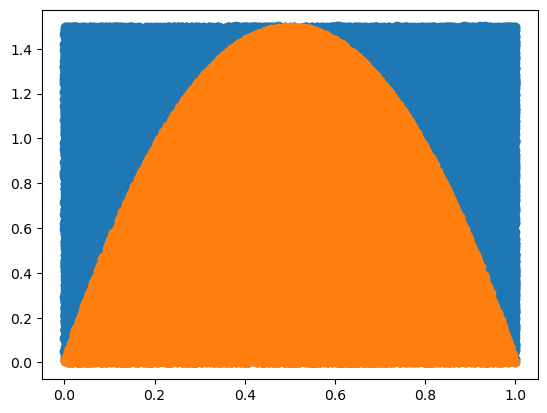

In [24]:
# Accept reject method.
fmax = 1.5
num = 10**5
x = np.random.uniform(0.0,1.0,num) #np.array([f(x) for x in np.random.uniform(0.0,1.0,1000)])
y = np.random.uniform(0.0,1.5,num)

condition = (y <= f(x))

plt.scatter(x,y)
plt.scatter(x[condition],y[condition])

### 2. Sampling 1D Distribution

We will be using the inverse linear interpolation.

$$ f(x) = 6x(1-x);  0 \leq x \leq 1 $$

The CFD will be,
$$ F(x) = \int_{0}^{1} 6x(1-x) dx = \int_{0}^{1} 6x - 6x^2 dx$$

<!-- $$ F(x) = \int_{0}^{1} 6x - 6x^2 dx$$ -->

$$ F(x) = \int_{0}^{1} 6x dx - \int_{0}^{1} 6x^2 dx = 6 {x^2 \over 2} - 6 {x^3 \over 3} dx$$

<!-- $$ F(x) = 6\int_{0}^{1} x dx - 6\int_{0}^{1} x^2 dx$$ -->

<!-- $$ F(x) = 6 {x^2 \over 2} - 6 {x^3 \over 3} dx$$ -->

$$ F(x) = 3x^2 - 2x^3 $$

In [94]:
def F(x):
    return  3*(x**2) - 2*(x**3)

In [95]:
number_of_points = 10**5
x = np.linspace(0,1,number_of_points)

Fi = Fx(x)

In [96]:
Finv = scipy.interpolate.interp1d(Fi, x, 'cubic')

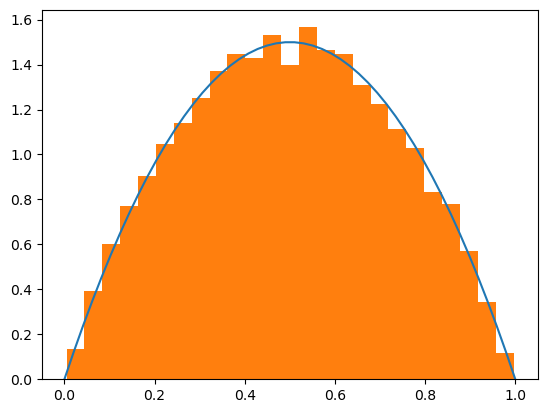

In [97]:
# test inverse sampling
u = np.random.uniform(0,1, 10000)
x = Finv(u)

xi = np.linspace(0,1); fi = f(xi)

plt.plot(xi, fi)
_ = plt.hist(x, 25, density=True)